Since we need to get the data through "stop and search by force" API which is dependent on force IDs, first we need to get the list of force IDs via the API: https://data.police.uk/api/forces

# **DATA GATHERING VIA API**

In [ ]:
'Import Libraries'

from urllib.request import urlopen
import json as js
html='https://data.police.uk/api/forces'  # Html to the force API
html_request=urlopen(html)
force_id=html_request.read()
force_ids=js.loads(force_id)              # Load the returned force_ids into a json object
ids=list()
for id in force_ids:
    id=id['id']
    ids.append(id)

Haven gotten the force ids, we can proceed to get the stop and search data for the respective force ids. The data collected is for the month of March 2021, hence we set date params as 2021-03

In [ ]:
base_url='https://data.police.uk/api/stops-force?'

In [ ]:
from urllib.parse import urlencode

In [ ]:
'Create a list to store all the data as they are being collected'

age_range=list()
self_defined_ethnicity=list()
outcome_linked_to_object_of_search=list()
datetime=list()
removal_of_more_than_outer_clothing=list()
operation=list()
officer_defined_ethnicity=list()
object_of_search=list()
involved_person=list()
gender=list()
legislation=list()
location=list()
outcome=list()
type_=list()
operation_name=list()
force_ids=list()

In [ ]:
'we loop through each of the force_id and collect their stop and search by force data for the month of march'


for id in ids:
    params=dict()                                     
    params['force']=id  
    params['date']='2021-03'                            
    service_url=urlencode(params)                   
    url=base_url+service_url
    'Many times a 500 Server error is returned due to errors from their server, a try and except as been used to catche this'
    try:
        html_stop_searches=urlopen(url)
    except:
        continue 
    stop_searches=html_stop_searches.read()
    js_stop_searches=js.loads(stop_searches)         

     

    for js_stop_search in js_stop_searches:
        force_ids.append(id)
        age_range.append(js_stop_search['age_range'])
        self_defined_ethnicity.append(js_stop_search['self_defined_ethnicity'])
        outcome_linked_to_object_of_search.append(js_stop_search['outcome_linked_to_object_of_search'])
        datetime.append(js_stop_search['datetime'])
        removal_of_more_than_outer_clothing.append(js_stop_search['removal_of_more_than_outer_clothing'])
        officer_defined_ethnicity.append(js_stop_search['officer_defined_ethnicity'])
        object_of_search.append(js_stop_search['object_of_search'])
        involved_person.append(js_stop_search['involved_person'])
        gender.append(js_stop_search['gender'])
        legislation.append(js_stop_search['legislation'])
        location.append(js_stop_search['location'])
        outcome.append(js_stop_search['outcome'])
        type_.append(js_stop_search['type'])
        operation_name.append(js_stop_search['operation_name'])
        operation.append(js_stop_search['operation'])
        







Create a dictionary of data names and column names to create a pandas dataframe

In [ ]:
data={'age_range':age_range,
'self_defined_ethnicity':self_defined_ethnicity,
'outcome_linked_to_object_of_search':outcome_linked_to_object_of_search,
'datetime':datetime,
'removal_of_more_than_outer_clothing':removal_of_more_than_outer_clothing,
'operation':operation,
'officer_defined_ethnicity':officer_defined_ethnicity,
'object_of_search':object_of_search,
'involved_person':involved_person,
'gender':gender,
'legislation':legislation,
'location':location,
'outcome':outcome,
'type_':type_,
'operation_name':operation_name,
'force_ids':force_ids}

In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame(data)
df.head(2)

,age_range,self_defined_ethnicity,outcome_linked_to_object_of_search,datetime,removal_of_more_than_outer_clothing,operation,officer_defined_ethnicity,object_of_search,involved_person,gender,legislation,location,outcome,type_,operation_name,force_ids
0,25-34,White - English/Welsh/Scottish/Northern Irish/...,None,2021-03-05T09:30:00+00:00,False,None,White,Controlled drugs,True,Male,Misuse of Drugs Act 1971 (section 23),"{'latitude': '51.407437', 'street': {'id': 539...",Arrest,Person search,None,avon-and-somerset
1,18-24,Mixed/Multiple ethnic groups - White and Black...,True,2021-03-03T20:10:00+00:00,False,None,Mixed,Controlled drugs,True,Male,Misuse of Drugs Act 1971 (section 23),"{'latitude': '51.504091', 'street': {'id': 547...",Arrest,Person search,None,avon-and-somerset


# **DATA CLEANING**

In [ ]:
'Extract  hour from dataframe'
df['datetime']= pd.to_datetime(df['datetime'])
df['Hour']=df['datetime'].dt.hour
df.drop('datetime', axis=1, inplace=True)

In [ ]:
'Extract the streets names from location column'

streets=list()
for i in df['location'].values:
    try:
        streets.append(i['street']['name'])
    except:
        streets.append('None')
    
df['location']=streets


  

In [ ]:
df.isnull().sum()

age_range                               6653
self_defined_ethnicity                  2587
outcome_linked_to_object_of_search     37217
removal_of_more_than_outer_clothing    33386
operation                              12902
officer_defined_ethnicity               4417
object_of_search                        3404
involved_person                            0
gender                                  4167
legislation                             2369
location                                   0
outcome                                    0
type_                                      0
operation_name                         50759
force_ids                                  0
Hour                                       0
dtype: int64

From the above result of df.isnull().sum() we see that the operation column has values as NONE, so drop the column and fill other missing values in the dataframe as Unknown to represent missing or absent

In [ ]:
df.drop('operation_name', axis=1,inplace=True)


In [ ]:
df.fillna('Unknown',inplace=True)

# **VISUALIZATIONS**

In [ ]:
from google.colab import files

Line graph showing the number of stop and search by force for each force

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import unittest

In [ ]:
def plot1():
  df['force_ids'].value_counts().to_frame().sample(frac=1).plot(kind='line', figsize=(15,8))

  plt.xlabel('Force')
  plt.ylabel('Count')
  plt.title('Line graph showing the number of stop and search by force for each force')


.
----------------------------------------------------------------------
Ran 1 test in 0.098s

OK


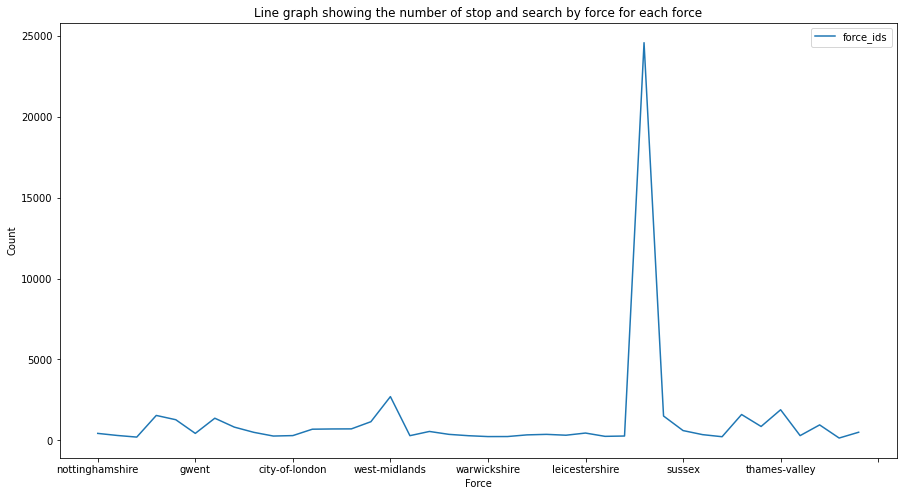

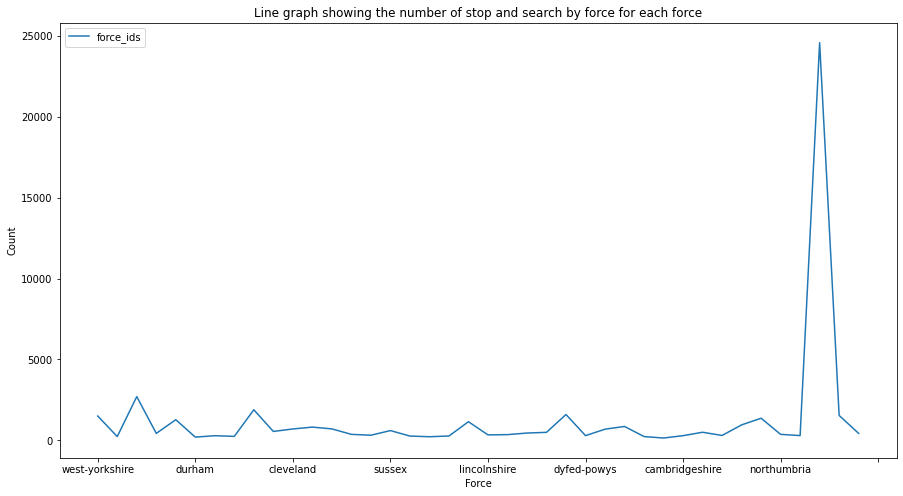

In [ ]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot1() is plot1()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Gender distribution visualization using countplot

In [ ]:
def plot2():
  fig, ax = plt.subplots(figsize=(15,8))
  import seaborn as sns
  sns.countplot(x=df['gender'])
  plt.xlabel('Gender')
  plt.ylabel('Count')
  plt.title('Gender distribution visualization using countplot')


.
----------------------------------------------------------------------
Ran 1 test in 0.770s

OK


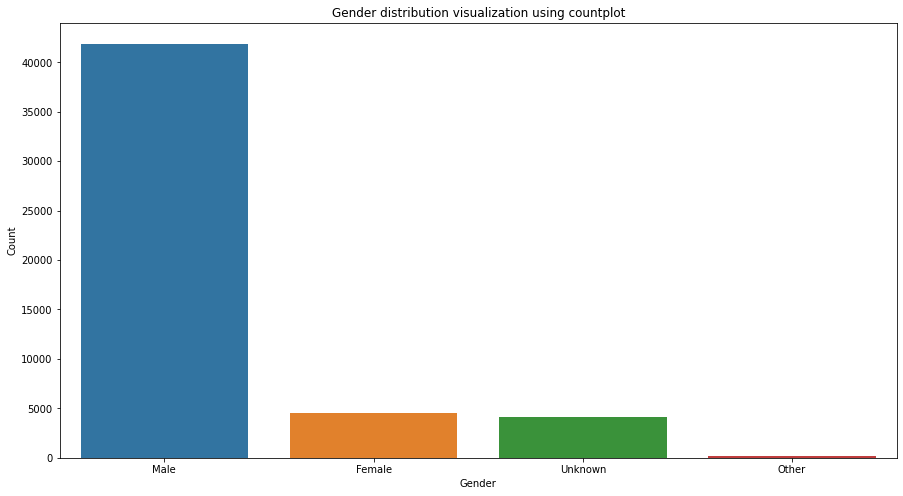

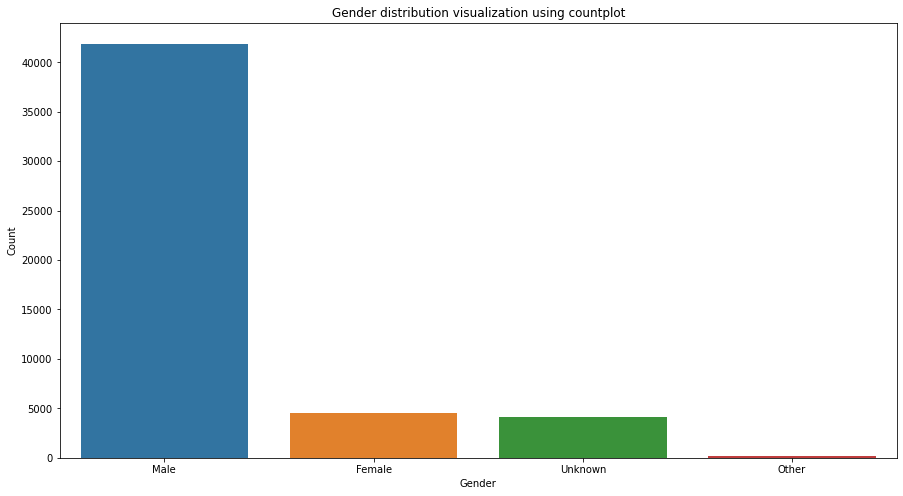

In [ ]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot2() is plot2()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Age range distribution visualization using Countplot

In [ ]:
def plot3():
  fig, ax = plt.subplots(figsize=(15,8))
  import seaborn as sns
  sns.countplot(x=df['age_range'])
  plt.xlabel('Age-range')
  plt.ylabel('Count')
  plt.title('Age range distribution visualization using Countplot')


.
----------------------------------------------------------------------
Ran 1 test in 0.189s

OK


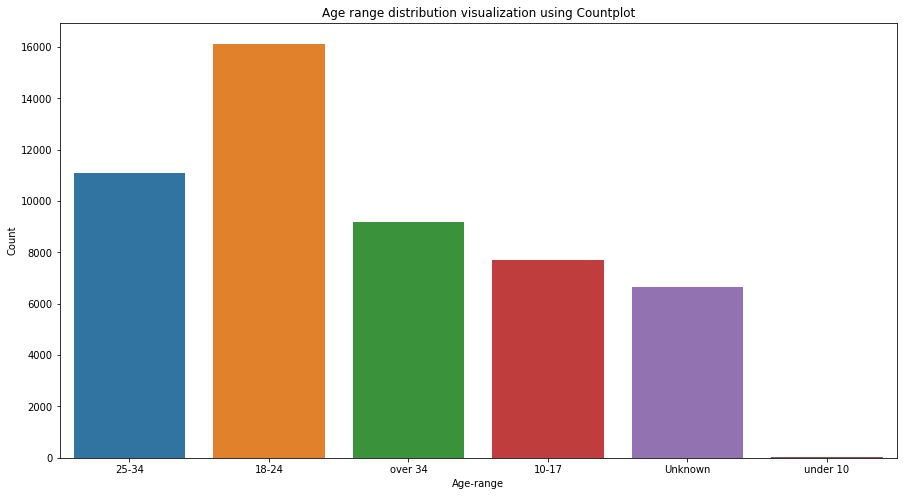

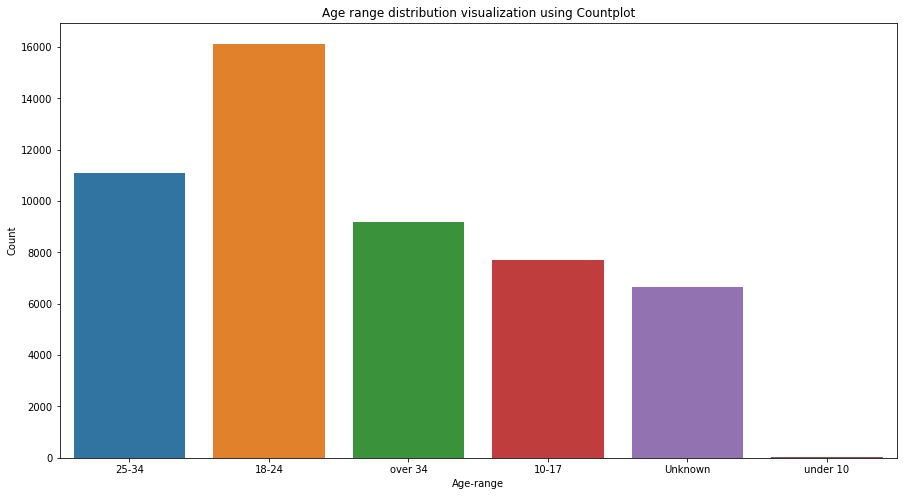

In [ ]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot3() is plot3()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Pie chart showing comparison of outcome_linked_to_object_of_search

In [ ]:
def plot4():
  df['outcome_linked_to_object_of_search'].value_counts().to_frame().plot(kind='pie',autopct='%1.1f%%', y='outcome_linked_to_object_of_search', figsize=(15,8))
  plt.title('Pie chart showing comparison of outcome_linked_to_object_of_search')


.
----------------------------------------------------------------------
Ran 1 test in 0.089s

OK


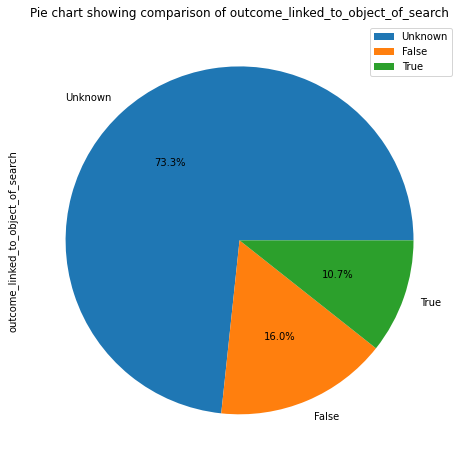

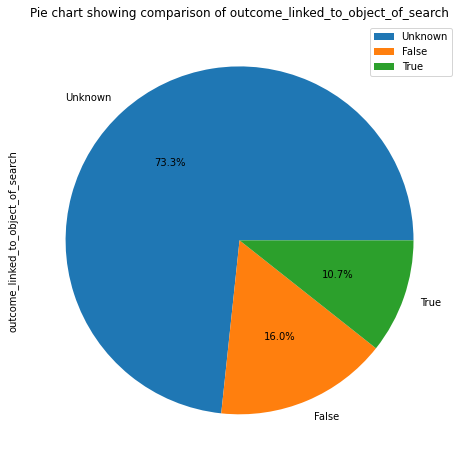

In [ ]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot4() is plot4()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Stacked bar chart showing trend for the "removal_of_more_than_outer_clothing" and 'outcome'

In [ ]:
def plot5():
  df.groupby('removal_of_more_than_outer_clothing')['outcome'].value_counts().to_frame().rename(columns={'outcome':'count'}).\
  reset_index().pivot("removal_of_more_than_outer_clothing", 'outcome',	'count').plot(kind='barh',stacked=True, width=0.5,figsize=(15,8))

  plt.xlabel('Count')

  plt.title('Stacked bar chart showing trend for the "removal_of_more_than_outer_clothing" and "outcome" ')


.
----------------------------------------------------------------------
Ran 1 test in 0.143s

OK


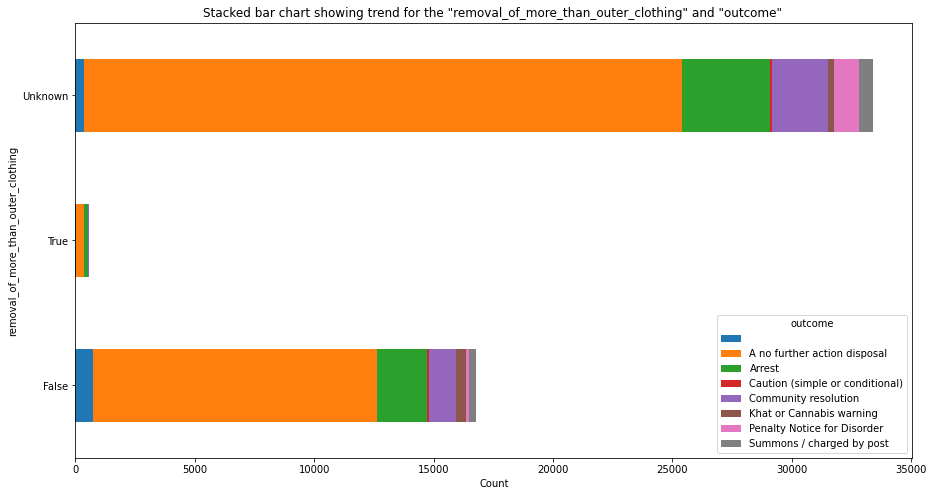

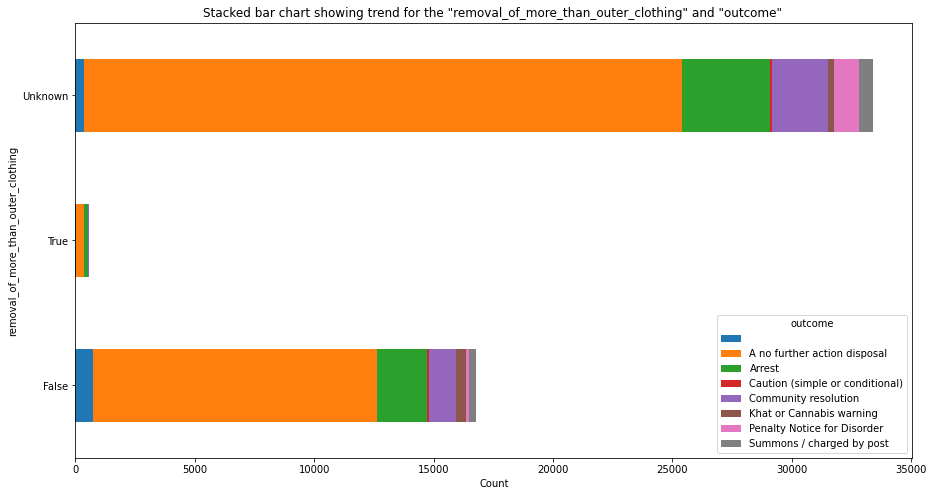

In [ ]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot5() is plot5()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Stacked bar chart showing trend for the "removal_of_more_than_outer_clothing" and 'object_of_search'

In [ ]:
def plot6():
  df.groupby('removal_of_more_than_outer_clothing')['object_of_search'].value_counts().to_frame().rename(columns={'object_of_search':'count'}).\
  reset_index().pivot("removal_of_more_than_outer_clothing", 'object_of_search',	'count').plot(kind='bar', stacked=True, width=0.3, figsize=(15,8))
  plt.ylabel('Count')
  plt.title('Stacked bar chart showing trend for the "removal_of_more_than_outer_clothing" and "object_of_search" ')


.
----------------------------------------------------------------------
Ran 1 test in 0.201s

OK


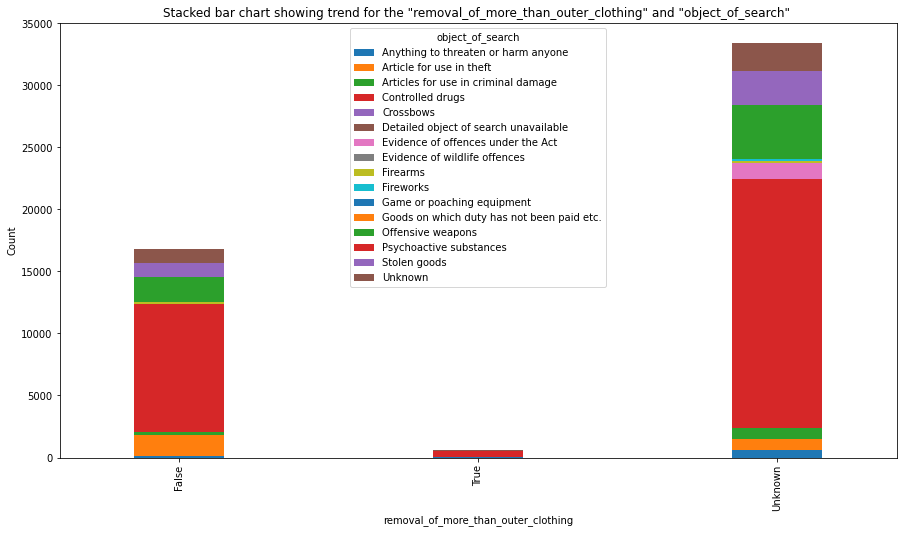

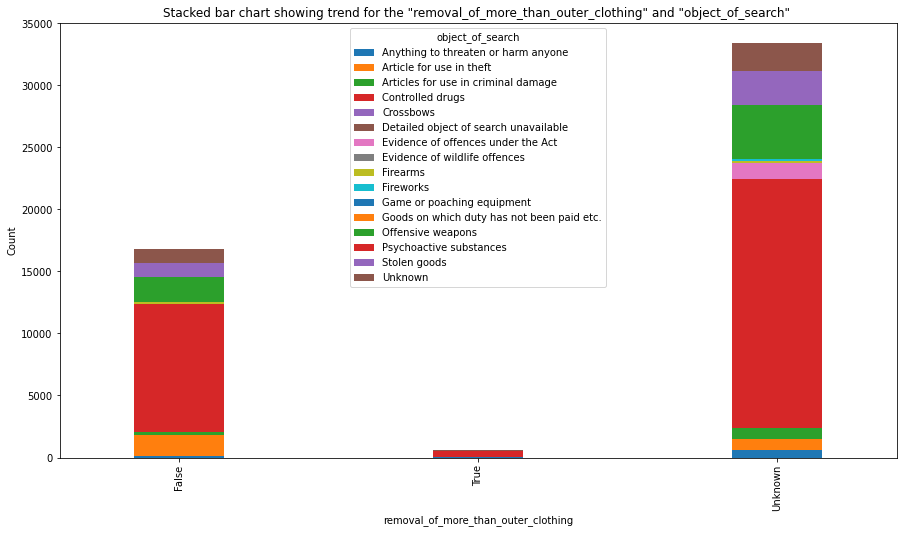

In [ ]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot6() is plot6()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

How many teenagers were stopped and searched by Cleveland Police in the month of march 2021

In [ ]:
def plot7():
  df[df['force_ids']=='cleveland'].value_counts('age_range').to_frame().plot(kind='bar', color='black', figsize=(15,8))
  plt.ylabel('Count')
  plt.title('How many teenagers were stopped and searched by Cleveland Police in the month of march 2021')


.
----------------------------------------------------------------------
Ran 1 test in 0.105s

OK


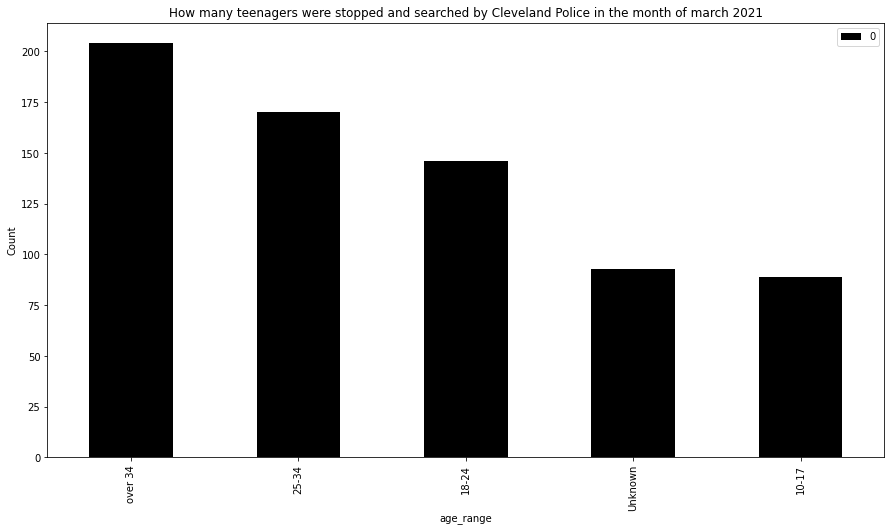

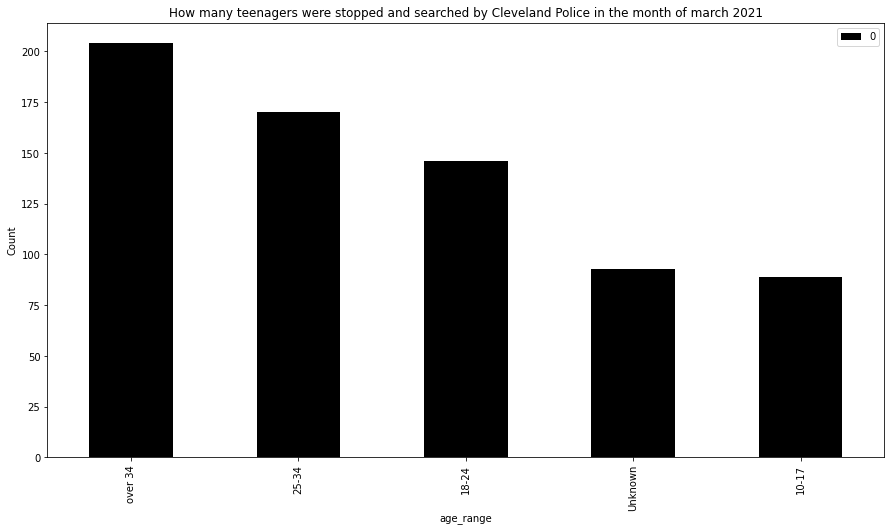

In [ ]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot7() is plot7()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Tree maps showing proportion of self_defined_ethnicity

In [ ]:
'Some processing on self_defined_ethnicity to extract specific ethnicity names'
self_defined_ethnicity_extract=list()
for i in df['self_defined_ethnicity'].values:
    self_defined_ethnicity_extract.append(i[:5])
df['self_defined_ethnicity_extract']=self_defined_ethnicity_extract
df['self_defined_ethnicity_extract'].replace('Unkno', 'Unknown', inplace=True)

In [ ]:
!pip install squarify 
import squarify

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

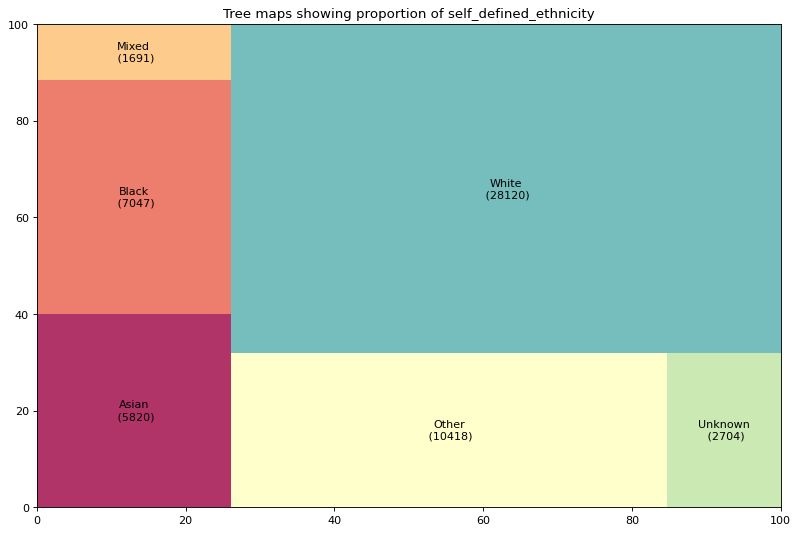

In [ ]:
# Prepare Data

df_treemap = df.groupby('self_defined_ethnicity_extract').size().reset_index(name='counts')
labels = df_treemap.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df_treemap['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)



plt.title('Tree maps showing proportion of self_defined_ethnicity')



Tree maps showing proportion of officer_defined_ethnicity

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

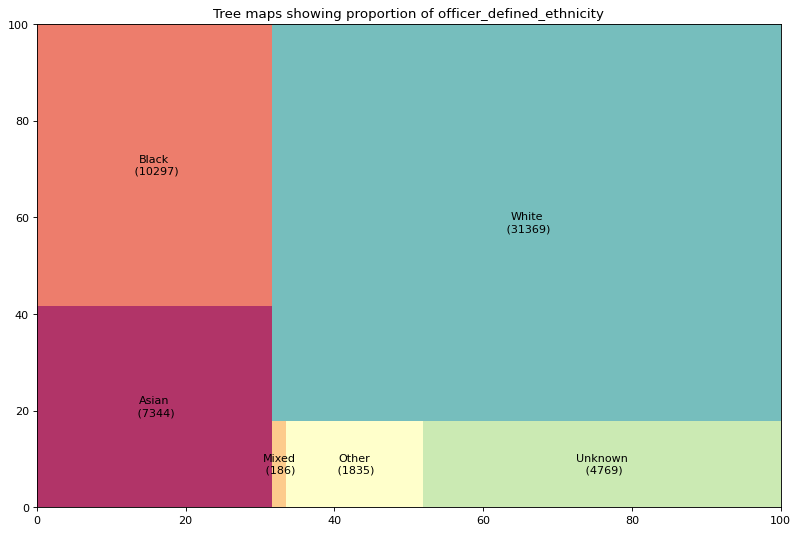

In [ ]:
df_treemap = df.groupby('officer_defined_ethnicity').size().reset_index(name='counts')
labels = df_treemap.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df_treemap['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('Tree maps showing proportion of officer_defined_ethnicity')


Grouped bar chart showing trend of distribution for officer_defined_ethnicity and self_defined_ethnicity

In [ ]:
df1=df['officer_defined_ethnicity'].value_counts().to_frame()
df2=df['self_defined_ethnicity_extract'].value_counts().to_frame()
df3=pd.concat([df1,df2], axis=1)

In [ ]:
def plot8():
  df3.plot(kind='bar', figsize=(15,8))
  plt.ylabel('Count')
  plt.xlabel('Ethnicity')
  plt.title('Grouped bar chart showing trend of distribution for officer_defined_ethnicity and self_defined_ethnicity')


.
----------------------------------------------------------------------
Ran 1 test in 0.093s

OK


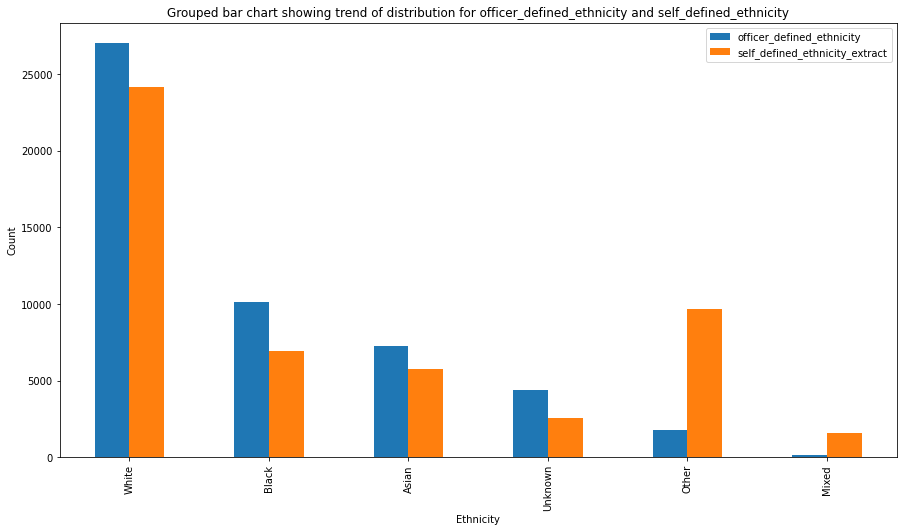

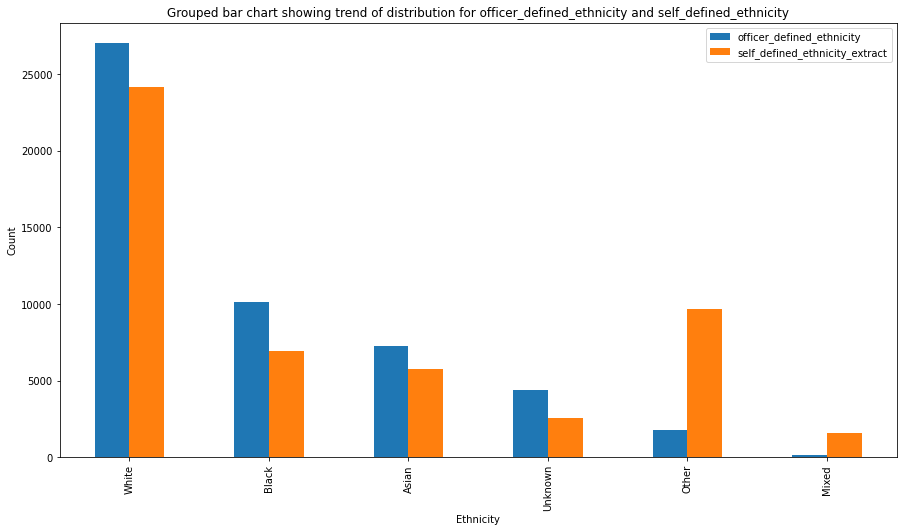

In [ ]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot8() is plot8()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

A pie chart to show the proportion of time office officer_defined_ethnicity tallies with the self_defined_ethnicity

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

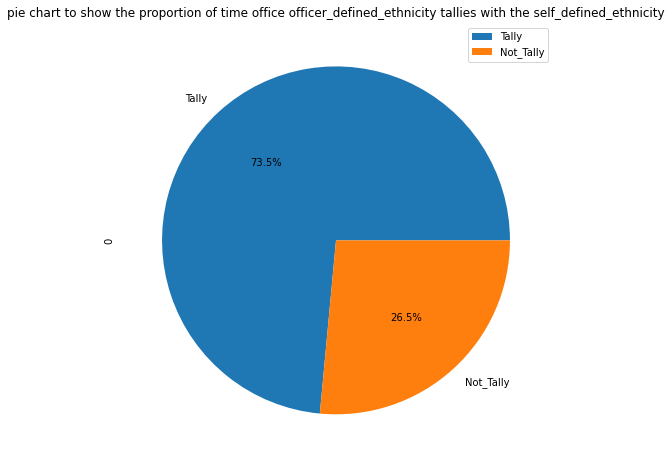

In [ ]:
Tally=0
Not_Tally=0


for a,b in zip(df['officer_defined_ethnicity'].values, df['self_defined_ethnicity_extract'].values):
  if a==b:
    Tally=Tally+1
  else:
    Not_Tally=Not_Tally + 1

df4=pd.DataFrame({'Tally':[Tally], 'Not_Tally':[Not_Tally]}).transpose().plot(kind='pie',y=0,autopct='%1.1f%%', figsize=(15,8))

plt.title('pie chart to show the proportion of time office officer_defined_ethnicity tallies with the self_defined_ethnicity')


A Grouped bar chart showing distribution of 'Arrest' and 'A no further action disposal' per object_of_search

In [ ]:
df5=df.groupby('object_of_search')['outcome'].value_counts().to_frame().rename(columns={'outcome':'count'}).reset_index()
df5=df5[df5['outcome'].isin(['Arrest', 'A no further action disposal']) ]


In [ ]:
def plot9():
  df5.pivot("object_of_search", 'outcome',	'count').plot(kind='bar', figsize=(15,8))
  plt.ylabel('Count')
  plt.title('Grouped bar chart showing distribution of "Arrest" and "A no further action disposal" per object_of_search')


.
----------------------------------------------------------------------
Ran 1 test in 0.119s

OK


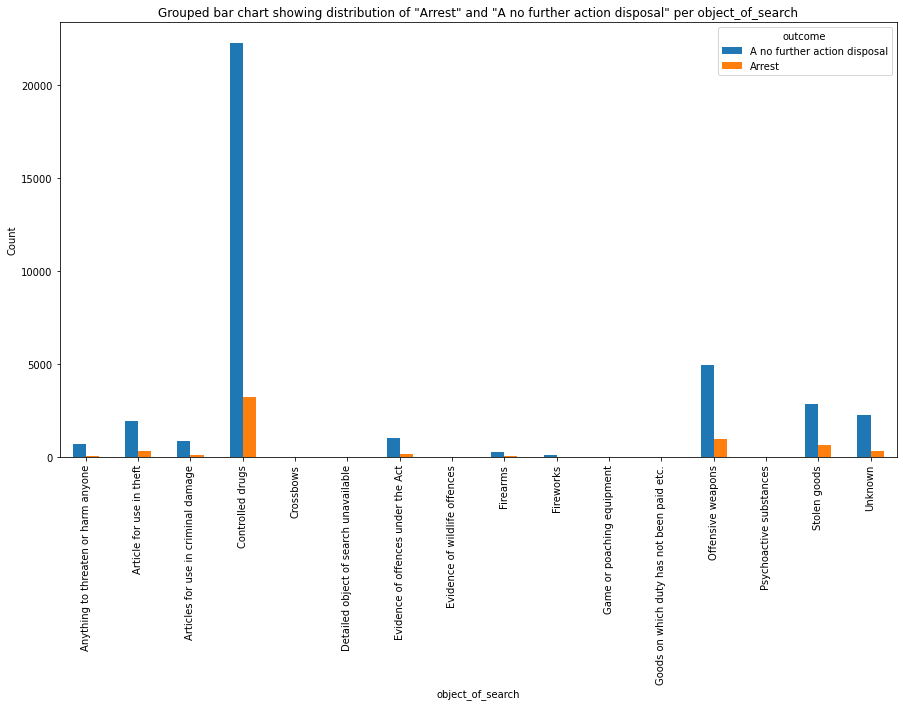

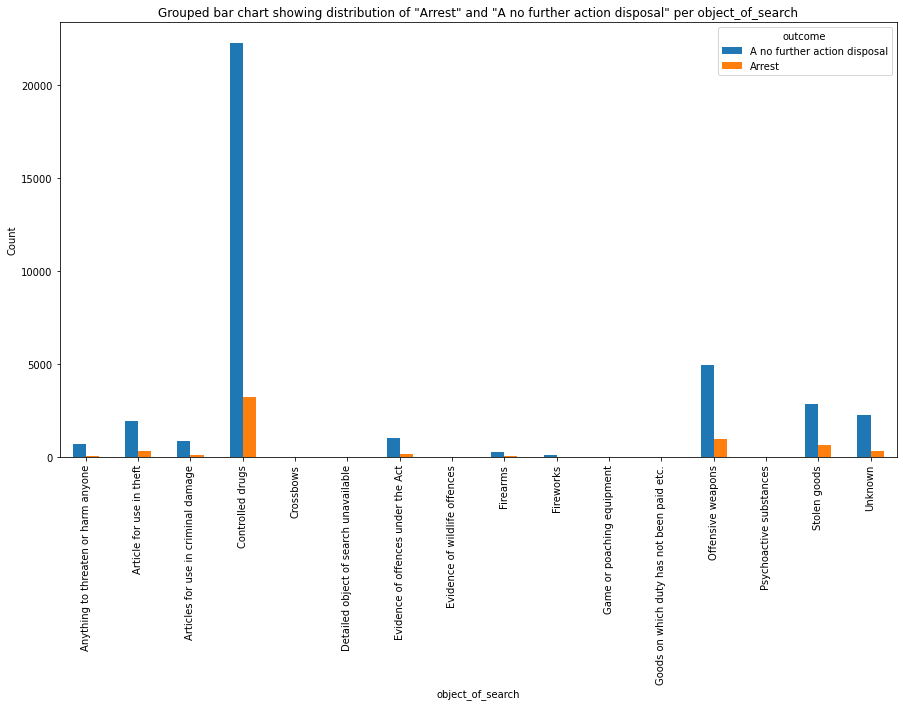

In [ ]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot9() is plot9()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Top 5 locations with highest search record?

In [ ]:
def plot10():
  df['location'].value_counts().to_frame().drop('None').head(5).sample(frac=1).plot(kind='bar', figsize=(15,8))
  plt.ylabel('Count')
  plt.xlabel('Location')
  plt.title('Top 5 locations with highest search record?')


.
----------------------------------------------------------------------
Ran 1 test in 0.121s

OK


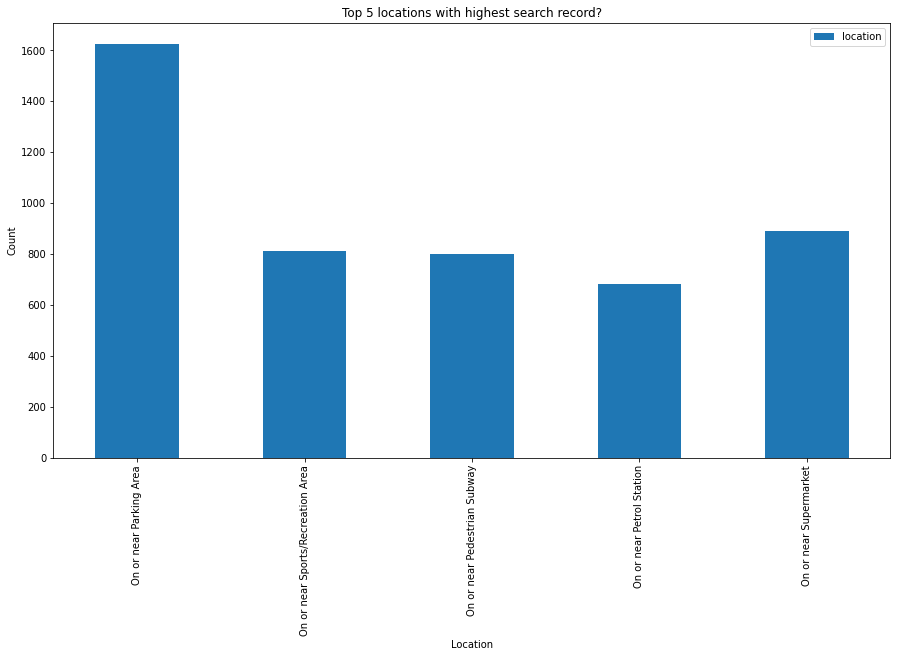

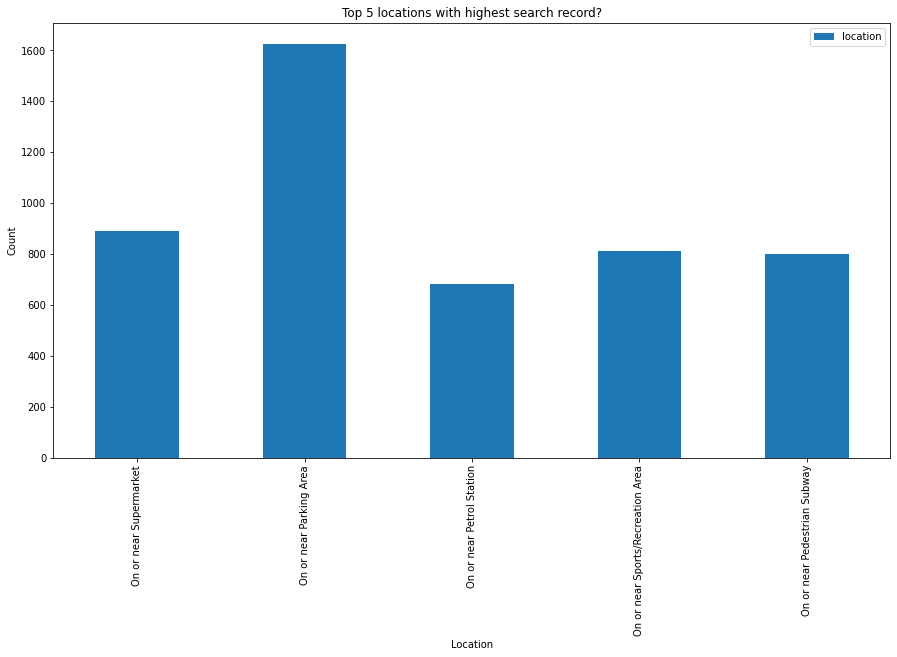

In [ ]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot10() is plot10()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Top 5 locations with highest arrest made?

In [ ]:
df_h=df.groupby('location')['outcome'].value_counts().to_frame().rename(columns={'outcome':'count'}).reset_index()
df_h=df_h[df_h['outcome']=='Arrest']
dfh=df_h.sort_values('count', ascending=False).drop(1).head(5).reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

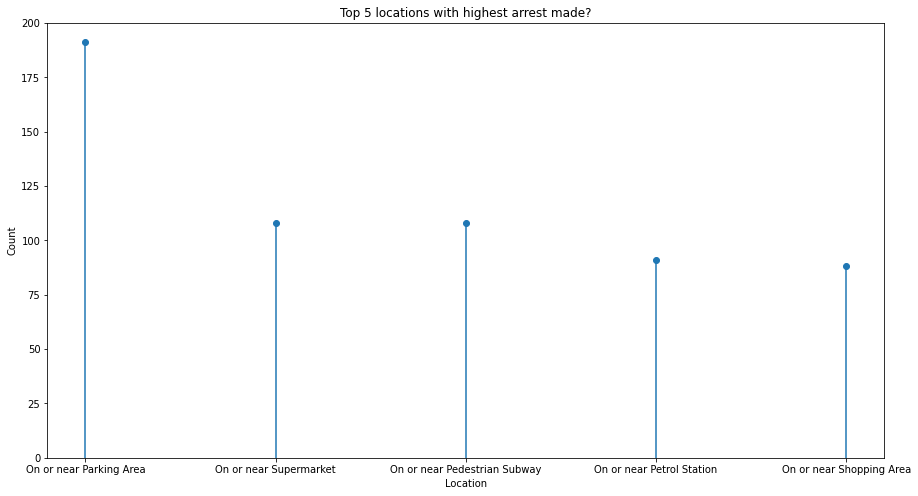

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

# Draw the stem and circle
ax.stem(dfh['location'],dfh['count'], basefmt=' ')

# Start the graph at 0
ax.set_ylim(0, 200)

plt.ylabel('Count')
plt.xlabel('Location')
plt.title('Top 5 locations with highest arrest made?')


Donut chart showing proportion of search types

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

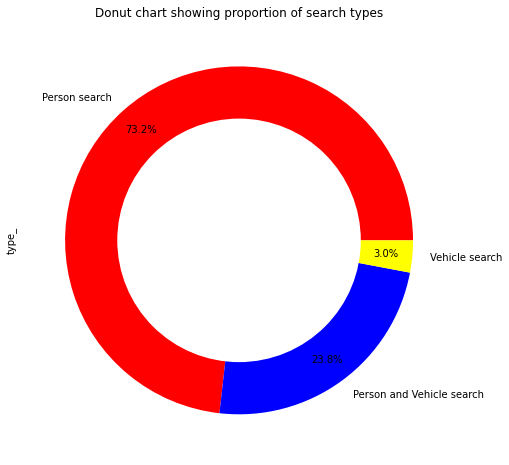

In [ ]:
df_t=df['type_'].value_counts().to_frame().reset_index()
colors= ['#FF0000', '#0000FF', '#FFFF00']
labels=['Person search','Person and Vehicle search','Vehicle search']
# Pie Chart
df_t['type_'].plot(kind='pie', colors=colors,labels=labels, autopct='%1.1f%%', pctdistance=0.85,figsize=(15,8))
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)


plt.title('Donut chart showing proportion of search types')


Area graph showing number of arrests and no further action disposal by the hour

In [ ]:
dfh=df.groupby('Hour')['outcome'].value_counts().to_frame().rename(columns={'outcome':'count'}).reset_index()
dfh=dfh[dfh['outcome'].isin(['Arrest', 'A no further action disposal']) ]

In [ ]:
def plot11():
  dfh.pivot('Hour', 'outcome', 'count').plot(kind='area', figsize=(15,8))
  plt.ylabel('Count')
  plt.title('Area graph showing number of arrests and no further action disposal by the hour')


.
----------------------------------------------------------------------
Ran 1 test in 0.066s

OK


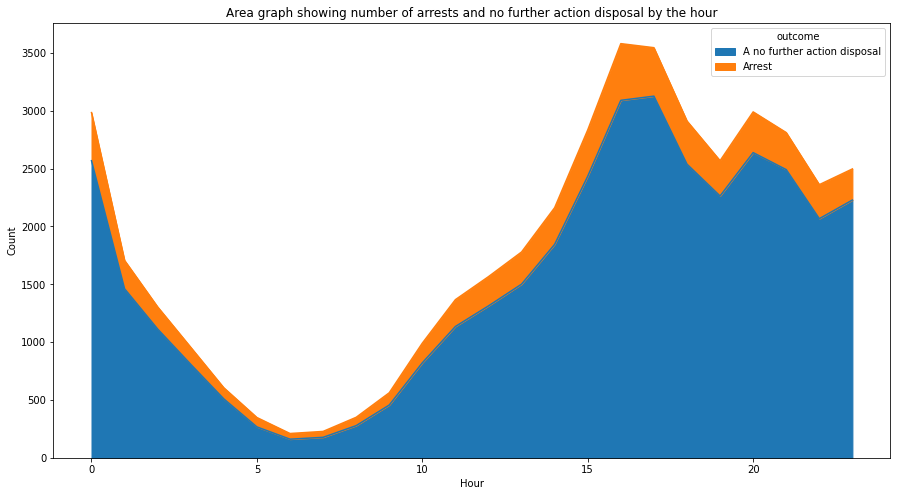

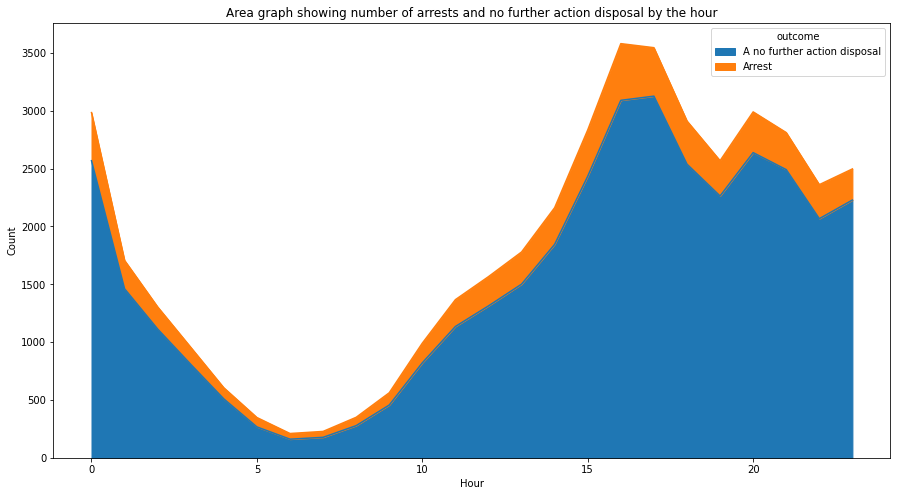

In [ ]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot11() is plot11()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Propotion of legislation power used for search

In [ ]:
!pip install pywaffle

In [ ]:
df_waffle=df['legislation'].value_counts().to_frame()
df_waffle['perc']=(df_waffle['legislation']/df_waffle['legislation'].sum()) * 100
df_waffle.reset_index(inplace=True)
df_waffle.rename(columns={'index': 'legislation_act'}, inplace=True)
df_waffle.drop([4,5,6,7,8,9,10], inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

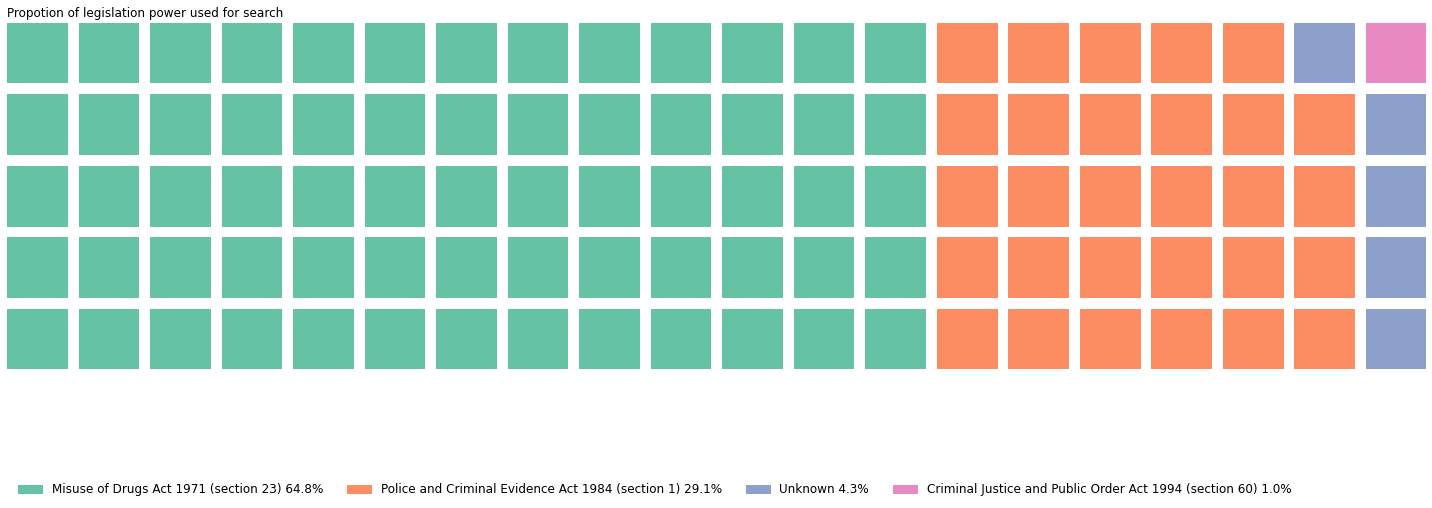

In [ ]:

from pywaffle import Waffle
  

  # To plot the waffle Chart
fig = plt.figure(
    FigureClass = Waffle,
    rows = 5,
    title={'label': 'Propotion of legislation power used for search', 'loc': 'left'},
    values = df_waffle.perc,
    labels = ['{} {:.1f}%'.format(k, v) for k, v in zip(df_waffle.legislation_act,df_waffle.perc)], 
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(df_waffle.perc),'fontsize': 12, 'framealpha': 0},
    figsize=(20,12)
)

